In [2]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Definir las rutas (cambia estas rutas según sea necesario)
train_dir = 'train'  # Carpeta de entrenamiento
test_dir = 'test'    # Carpeta de prueba

# Verificar si las rutas existen
print("Existe la ruta de entrenamiento:", os.path.exists(train_dir))
print("Existe la ruta de prueba:", os.path.exists(test_dir))

# Definir parámetros de procesamiento de imágenes
image_size = (128, 128)
batch_size = 32

# Crear los generadores de datos
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0, 
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Crear el generador de datos para entrenamiento y prueba
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

# Resumen del generador para verificar que se han cargado las imágenes
print("Número de imágenes en entrenamiento:", train_generator.samples)
print("Número de imágenes en prueba:", test_generator.samples)


Existe la ruta de entrenamiento: True
Existe la ruta de prueba: True
Found 11879 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Número de imágenes en entrenamiento: 11879
Número de imágenes en prueba: 2000


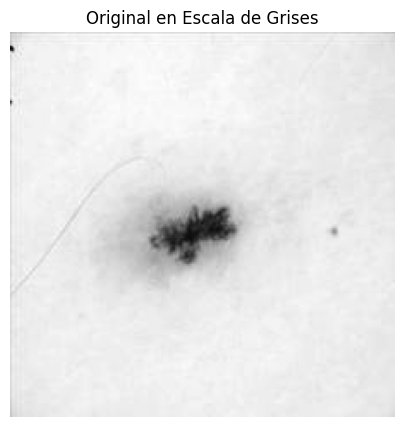

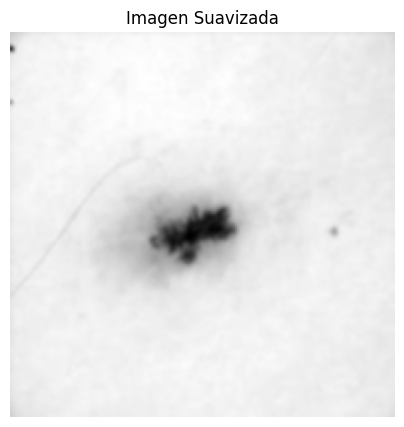

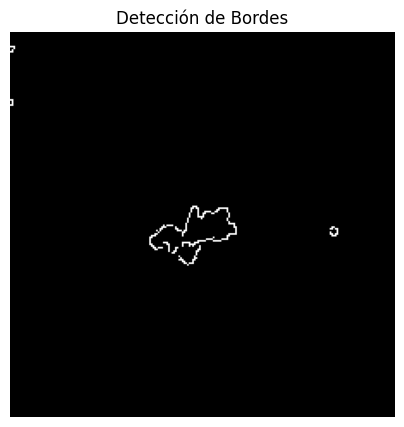

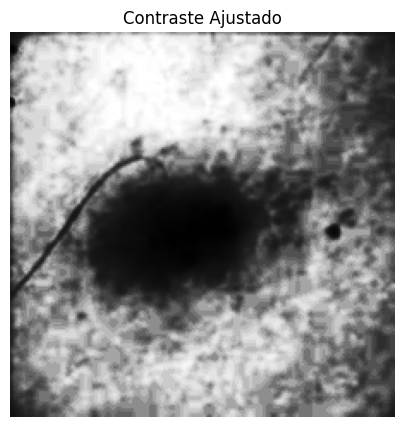

In [3]:
import cv2 
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import os

# Función para mostrar una imagen
def show_image(title, image):
    plt.figure(figsize=(5, 5))
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Función para preprocesar una imagen
def preprocess_image(image_path):
    # Leer la imagen
    image = cv2.imread(image_path)
    
    # Convertir a escala de grises
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Aplicar suavizado Gaussiano para reducir el ruido
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
    
    # Detección de bordes usando Canny
    edges = cv2.Canny(blurred_image, 50, 150)
    
    # Ajuste de contraste usando ecualización de histograma
    equalized_image = cv2.equalizeHist(blurred_image)
    
    return gray_image, blurred_image, edges, equalized_image

# Mostrar preprocesamiento para algunas imágenes de ejemplo
# Ruta de algunas imágenes de muestra (puedes cambiar las rutas a las que tengas en tu conjunto de datos)
sample_image_path = os.path.join(train_dir, 'Benign', os.listdir(os.path.join(train_dir, 'Benign'))[0])

# Aplicar preprocesamiento a la imagen de muestra
gray, blurred, edges, equalized = preprocess_image(sample_image_path)

# Mostrar las imágenes preprocesadas
show_image("Original en Escala de Grises", gray)
show_image("Imagen Suavizada", blurred)
show_image("Detección de Bordes", edges)
show_image("Contraste Ajustado", equalized)


Perfecto. Vamos a crear un código completo para el Paso 2: Preprocesamiento de Imágenes. El preprocesamiento incluirá las siguientes técnicas:

Redimensionado: Asegurarse de que todas las imágenes tengan el mismo tamaño para que puedan ser procesadas por el modelo.
Conversión a Escala de Grises: (Opcional) Convertir las imágenes a escala de grises si se desea reducir la complejidad de los datos.
Eliminación de Ruido: Aplicar un filtro Gaussiano para suavizar las imágenes y eliminar el ruido.
Ajuste de Contraste: Mejorar el contraste de las imágenes usando ecualización de histograma.
Detección de Bordes: (Opcional) Resaltar los contornos para identificar formas y estructuras importantes.
Guardar las Imágenes Preprocesadas: Almacenar las imágenes preprocesadas en un directorio nuevo para utilizarlas en el entrenamiento del modelo.

In [4]:
import cv2
import os
import numpy as np
import shutil

# Definir directorios de origen y destino
train_dir = 'train'  # Directorio de imágenes de entrenamiento
test_dir = 'test'    # Directorio de imágenes de prueba

# Directorios de destino para guardar las imágenes preprocesadas
preprocessed_train_dir = 'preprocessed_train'
preprocessed_test_dir = 'preprocessed_test'

# Crear directorios de destino si no existen
os.makedirs(preprocessed_train_dir, exist_ok=True)
os.makedirs(preprocessed_test_dir, exist_ok=True)

# Función para preprocesar una imagen
def preprocess_image(image_path):
    # Leer la imagen en color
    image = cv2.imread(image_path)
    
    # Redimensionar la imagen
    image_resized = cv2.resize(image, (128, 128))
    
    # Convertir a escala de grises (opcional)
    gray_image = cv2.cvtColor(image_resized, cv2.COLOR_BGR2GRAY)
    
    # Aplicar suavizado Gaussiano para reducir el ruido
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
    
    # Ajuste de contraste usando ecualización de histograma
    equalized_image = cv2.equalizeHist(blurred_image)
    
    # Opción para resaltar bordes (opcional, coméntalo si no deseas usarlo)
    edges = cv2.Canny(equalized_image, 50, 150)
    
    return equalized_image  # Retornar la imagen preprocesada

# Función para aplicar preprocesamiento a todas las imágenes de un directorio y guardarlas
def preprocess_and_save_images(source_dir, dest_dir):
    # Iterar sobre todas las subcarpetas y archivos del directorio fuente
    for subdir, _, files in os.walk(source_dir):
        for file in files:
            # Obtener la ruta completa de la imagen
            image_path = os.path.join(subdir, file)
            
            # Aplicar preprocesamiento a la imagen
            preprocessed_image = preprocess_image(image_path)
            
            # Obtener la subcarpeta (Benign o Malignant) y crearla en el directorio de destino si no existe
            subfolder_name = os.path.basename(subdir)
            dest_subfolder = os.path.join(dest_dir, subfolder_name)
            os.makedirs(dest_subfolder, exist_ok=True)
            
            # Guardar la imagen preprocesada
            dest_image_path = os.path.join(dest_subfolder, file)
            cv2.imwrite(dest_image_path, preprocessed_image)

# Preprocesar y guardar las imágenes de entrenamiento
print("Preprocesando imágenes de entrenamiento...")
preprocess_and_save_images(train_dir, preprocessed_train_dir)
print("Preprocesamiento de imágenes de entrenamiento completado.")

# Preprocesar y guardar las imágenes de prueba
print("Preprocesando imágenes de prueba...")
preprocess_and_save_images(test_dir, preprocessed_test_dir)
print("Preprocesamiento de imágenes de prueba completado.")


Preprocesando imágenes de entrenamiento...
Preprocesamiento de imágenes de entrenamiento completado.
Preprocesando imágenes de prueba...
Preprocesamiento de imágenes de prueba completado.


In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Definir la ruta de los directorios de entrenamiento y prueba
train_dir = './preprocessed_train'  # Ajusta esta ruta según la ubicación de las imágenes
test_dir = './preprocessed_test'

# Definir parámetros para el tamaño de las imágenes y tamaño de lote
image_size = (128, 128)
batch_size = 32
input_shape = (128, 128, 3)  # Mantener imágenes en formato RGB (3 canales)

# Crear los generadores de datos con aumento de datos para entrenamiento y normalización para prueba
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    shear_range=0.3,
    zoom_range=0.3,
    rotation_range=30,
    horizontal_flip=True,
    vertical_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Crear generadores de datos de entrenamiento y prueba con imágenes en formato RGB
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    color_mode='rgb'  # Cargar imágenes en formato RGB
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    color_mode='rgb'  # Cargar imágenes en formato RGB
)

# Definir la arquitectura del modelo CNN
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),  # Forma de entrada para imágenes RGB
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Clasificación binaria
])

# Compilar el modelo
cnn_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Mostrar el resumen del modelo
cnn_model.summary()

# Entrenar el modelo
history = cnn_model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = cnn_model.evaluate(test_generator)
print(f"Pérdida en el conjunto de prueba: {test_loss}")
print(f"Precisión en el conjunto de prueba: {test_accuracy}")


Found 11879 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,749,249 (10.49 MB)

 Trainable params: 2,749,249 (10.49 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
372/372 ━━━━━━━━━━━━━━━━━━━━ 186s 490ms/step - accuracy: 0.5441 - loss: 0.6834 - val_accuracy: 0.7445 - val_loss: 0.5581
Epoch 2/20
372/372 ━━━━━━━━━━━━━━━━━━━━ 162s 436ms/step - accuracy: 0.7270 - loss: 0.5512 - val_accuracy: 0.7030 - val_loss: 0.5331
Epoch 3/20
372/372 ━━━━━━━━━━━━━━━━━━━━ 181s 486ms/step - accuracy: 0.7481 - loss: 0.5169 - val_accuracy: 0.7545 - val_loss: 0.4752
Epoch 4/20
372/372 ━━━━━━━━━━━━━━━━━━━━ 187s 501ms/step - accuracy: 0.7522 - loss: 0.5036 - val_accuracy: 0.8245 - val_loss: 0.4096
Epoch 5/20
372/372 ━━━━━━━━━━━━━━━━━━━━ 170s 457ms/step - accuracy: 0.7672 - loss: 0.4901 - val_accuracy: 0.7405 - val_loss: 0.4858
Epoch 6/20
372/372 ━━━━━━━━━━━━━━━━━━━━ 176s 473ms/step - accuracy: 0.7680 - loss: 0.4840 - val_accuracy: 0.8110 - val_loss: 0.4181
Epoch 7/20
372/372 ━━━━━━━━━━━━━━━━━━━━ 172s 462ms/step - accuracy: 0.7808 - loss: 0.4684 - val_accuracy: 0.7620 - val_loss: 0.5069
Epoch 8/20
372/372 ━━━━━━━━━━━━━━━━━━━━ 171s 459ms/step - accuracy: 0.7811 -

Rendimiento del modelo:

A medida que avanzas por las épocas, las métricas de precisión aumentan y la pérdida disminuye, lo que indica que el modelo está aprendiendo y mejorando.
Al final, el modelo alcanza una precisión de 0.8284 (82.84%) en el conjunto de prueba y una pérdida de 0.3664.

Precisión en el conjunto de prueba: La precisión final del modelo es 82.84%, lo que significa que el modelo está clasificado correctamente el 82.84% de las imágenes en el conjunto de prueba (es decir, diferenciando entre lesiones benignas y malignas).
Pérdida en el conjunto de prueba: Una pérdida más baja indica que el modelo está más cerca de hacer predicciones perfectas. En este caso, la pérdida final es 0.3664, lo cual es razonable.

ME CENTRO EN AJUSTAR LOS HYPERPARAMETROS

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Hiperparámetros que puedes ajustar
learning_rate = 0.0001  # Ajusta la tasa de aprendizaje
batch_size = 64  # Ajusta el tamaño de lote
epochs = 30  # Aumenta o disminuye el número de épocas
dropout_rate = 0.3  # Ajusta la tasa de Dropout

# Definir el directorio de entrenamiento y prueba
train_dir = 'preprocessed_train'
test_dir = 'preprocessed_test'

# Tamaño de las imágenes
image_size = (128, 128)
input_shape = (128, 128, 3)  # Imágenes en color

# Crear los generadores de datos
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    shear_range=0.3,
    zoom_range=0.3,
    rotation_range=30,
    horizontal_flip=True,
    vertical_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Generador de datos de entrenamiento y prueba
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    color_mode='rgb'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    color_mode='rgb'
)

# Definir la arquitectura del modelo CNN con Dropout ajustado
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(dropout_rate),  # Ajustar Dropout
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(dropout_rate),  # Ajustar Dropout
    tf.keras.layers.Dense(1, activation='sigmoid')  # Clasificación binaria
])

# Compilar el modelo ajustando la tasa de aprendizaje
optimizer = Adam(learning_rate=learning_rate)
cnn_model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Entrenar el modelo con los hiperparámetros ajustados
history = cnn_model.fit(
    train_generator,
    epochs=epochs,  # Número de épocas ajustado
    validation_data=test_generator
)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = cnn_model.evaluate(test_generator)
print(f"Pérdida en el conjunto de prueba: {test_loss}")
print(f"Precisión en el conjunto de prueba: {test_accuracy}")


Found 11879 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/30
186/186 ━━━━━━━━━━━━━━━━━━━━ 209s 1s/step - accuracy: 0.5914 - loss: 0.6582 - val_accuracy: 0.7145 - val_loss: 0.5563
Epoch 2/30
 53/186 ━━━━━━━━━━━━━━━━━━━━ 1:26 648ms/step - accuracy: 0.7378 - loss: 0.5369